<a href="https://colab.research.google.com/github/bonareri/Python-Data-Analysis/blob/main/Numpy5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numpy Exercise 5

### All of the questions in this exercise are attributed to rougier/numpy-100

In [1]:
import numpy as np

#### 61. Find the nearest value from a given value in an array (★★☆)

In [6]:
def find_nearest(array, target):
    # Convert the list to a NumPy array
    array = np.array(array)
    # Find the index of the nearest value
    idx = (np.abs(array - target)).argmin()
    # Return the nearest value
    return array[idx]

    array = [10, 22, 14, 26, 35, 40]
    target = 20
    nearest_value = find_nearest(array, target)
    print("The nearest value to", target, "is", nearest_value)

#### 62. Considering two arrays with shape (1,3) and (3,1), how to compute their sum using an iterator? (★★☆)

In [7]:
# Define the arrays with shapes (1, 3) and (3, 1)
array1 = np.array([[1, 2, 3]])  # Shape (1, 3)
array2 = np.array([[4], [5], [6]])  # Shape (3, 1)

# Create an iterator with broadcasting enabled
result = array1 + array2
iterator = np.nditer(result, flags=['multi_index'])

# Print the sum for each element
print("Element-wise sum:")
for x in iterator:
    print(f"Index {iterator.multi_index}: {x}")


Element-wise sum:
Index (0, 0): 5
Index (0, 1): 6
Index (0, 2): 7
Index (1, 0): 6
Index (1, 1): 7
Index (1, 2): 8
Index (2, 0): 7
Index (2, 1): 8
Index (2, 2): 9


#### 63. Create an array class that has a name attribute (★★☆)

In [8]:
class Array:
    def __init__(self, data, name="Unnamed Array"):
        # Initialize the array data and name
        self.data = np.array(data)
        self.name = name

    def __repr__(self):
        # Return a formatted string for easy display of the array and its name
        return f"{self.name}:\n{self.data}"

    def set_name(self, new_name):
        # Method to set a new name for the array
        self.name = new_name

    def get_name(self):
        # Method to get the current name of the array
        return self.name

    def sum(self):
        # Example method to return the sum of all elements in the array
        return self.data.sum()

    # Add other methods as needed

# Example Usage
arr = Array([[1, 2, 3], [4, 5, 6]], name="My Array")
print(arr)           # Prints the array with its name
print("Sum:", arr.sum())  # Prints the sum of all elements
arr.set_name("Updated Array")
print(arr.get_name()) # Prints the updated name


My Array:
[[1 2 3]
 [4 5 6]]
Sum: 21
Updated Array


#### 64. Consider a given vector, how to add 1 to each element indexed by a second vector (be careful with repeated indices)? (★★★)

In [9]:
# Given vector
vector = np.array([10, 20, 30, 40, 50])

# Indices where 1 should be added
indices = np.array([1, 3, 1, 4, 3, 1])

# Use np.add.at to handle repeated indices correctly
np.add.at(vector, indices, 1)

print("Updated vector:", vector)

Updated vector: [10 23 30 42 51]


#### 65. How to accumulate elements of a vector (X) to an array (F) based on an index list (I)? (★★★)

In [10]:
# Example vector X
X = np.array([1, 2, 3, 4, 5])

# Index list I (where to add each element of X in array F)
I = np.array([0, 2, 1, 2, 0])

# Initialize array F with zeros, with a size large enough to include all indices in I
F = np.zeros(3)

# Accumulate values in X into F based on indices in I
np.add.at(F, I, X)

print("Accumulated array F:", F)


Accumulated array F: [6. 3. 6.]


#### 66. Considering a (w,h,3) image of (dtype=ubyte), compute the number of unique colors (★★☆)

In [11]:
# Example image array with shape (w, h, 3) and dtype=ubyte
w, h = 100, 100
image = np.random.randint(0, 256, size=(w, h, 3), dtype=np.uint8)

# Reshape the image to a 2D array of pixels, where each row is a color (R, G, B)
pixels = image.reshape(-1, 3)

# Find unique rows (unique colors) and count them
unique_colors = np.unique(pixels, axis=0)
num_unique_colors = unique_colors.shape[0]

print("Number of unique colors:", num_unique_colors)


Number of unique colors: 9992


#### 67. Considering a four dimensions array, how to get sum over the last two axis at once? (★★★)

In [12]:
# Example 4D array
array = np.random.rand(3, 4, 5, 6)

# Sum over the last two axes
result = np.sum(array, axis=(-2, -1))

print("Resulting array after summing over the last two axes:", result)
print("Shape of the resulting array:", result.shape)


Resulting array after summing over the last two axes: [[12.42415526 18.05046049 14.57714606 16.82152235]
 [14.23156215 16.18083026 13.72669439 17.44625801]
 [14.14315355 16.6076829  16.02393524 14.46315758]]
Shape of the resulting array: (3, 4)


#### 68. Considering a one-dimensional vector D, how to compute means of subsets of D using a vector S of same size describing subset  indices? (★★★)

In [13]:
# Example data
D = np.array([10, 20, 30, 40, 50, 60, 70])
S = np.array([0, 1, 0, 1, 0, 1, 0])  # Subset indices

# Calculate the sum and count for each subset defined by S
unique_indices = np.unique(S)
means = np.array([D[S == i].mean() for i in unique_indices])

print("Means of each subset:", means)


Means of each subset: [40. 40.]


#### 69. How to get the diagonal of a dot product? (★★★)

#### 70. Consider the vector [1, 2, 3, 4, 5], how to build a new vector with 3 consecutive zeros interleaved between each value? (★★★)

In [14]:
# Example matrices
A = np.random.rand(3, 4)
B = np.random.rand(4, 3)

# Compute only the diagonal of the dot product A @ B
diagonal = np.einsum('ij,ji->i', A, B)

print("Diagonal of the dot product:", diagonal)


Diagonal of the dot product: [1.58346    1.40918475 0.48572823]


#### 71. Consider an array of dimension (5,5,3), how to mulitply it by an array with dimensions (5,5)? (★★★)

In [15]:
# Example arrays
array_3d = np.random.rand(5, 5, 3)  # Shape (5, 5, 3)
array_2d = np.random.rand(5, 5)     # Shape (5, 5)

# Multiply the 3D array by the 2D array using broadcasting
result = array_3d * array_2d[:, :, np.newaxis]  # Expand dimensions of array_2d

print("Resulting array shape:", result.shape)  # Should be (5, 5, 3)


Resulting array shape: (5, 5, 3)


#### 72. How to swap two rows of an array? (★★★)

In [16]:
# Create a sample array
array = np.array([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9]])

# Specify the indices of the rows to swap
row1, row2 = 0, 2  # Swapping the first and the third rows

# Swap the rows using indexing
array[[row1, row2]] = array[[row2, row1]]

print("Array after swapping rows:")
print(array)


Array after swapping rows:
[[7 8 9]
 [4 5 6]
 [1 2 3]]


#### 73. Consider a set of 10 triplets describing 10 triangles (with shared vertices), find the set of unique line segments composing all the  triangles (★★★)

In [17]:
# Define a set of triplets (each triplet represents a triangle by its vertices)
triplets = [
    (0, 1, 2),  # Triangle 1
    (0, 2, 3),  # Triangle 2
    (1, 2, 4),  # Triangle 3
    (3, 4, 5),  # Triangle 4
    (0, 3, 5),  # Triangle 5
    (1, 2, 5),  # Triangle 6
    (0, 4, 6),  # Triangle 7
    (1, 3, 7),  # Triangle 8
    (2, 5, 8),  # Triangle 9
    (4, 6, 9)   # Triangle 10
]

# Initialize a set to store unique line segments
unique_segments = set()

# Loop through each triplet
for a, b, c in triplets:
    # Create line segments as tuples (min, max) to ensure uniqueness
    unique_segments.add(tuple(sorted((a, b))))
    unique_segments.add(tuple(sorted((b, c))))
    unique_segments.add(tuple(sorted((c, a))))

# Convert the set to a list (if needed) and print the result
unique_segments = list(unique_segments)

print("Unique line segments:", unique_segments)
print("Number of unique line segments:", len(unique_segments))


Unique line segments: [(3, 4), (4, 9), (3, 7), (4, 6), (0, 2), (0, 5), (2, 5), (1, 3), (2, 8), (4, 5), (0, 1), (2, 4), (1, 2), (0, 4), (1, 5), (3, 5), (5, 8), (0, 3), (1, 4), (0, 6), (2, 3), (1, 7), (6, 9)]
Number of unique line segments: 23


#### 74. Given a sorted array C that corresponds to a bincount, how to produce an array A such that np.bincount(A) == C? (★★★)

In [18]:
# Given sorted bincount array C
C = np.array([0, 2, 3, 1])  # This means: 0 appears 0 times, 1 appears 2 times, 2 appears 3 times, 3 appears 1 time

# Generate the array A based on the bincount C
A = np.concatenate([np.full((count,), index) for index, count in enumerate(C)])

print("Array A:", A)
print("Bincount of A:", np.bincount(A))


Array A: [1 1 2 2 2 3]
Bincount of A: [0 2 3 1]


#### 75. How to compute averages using a sliding window over an array? (★★★)

In [19]:
def sliding_window_average(arr, window_size):
    # Create a kernel for convolution
    kernel = np.ones(window_size) / window_size
    # Use np.convolve to compute the sliding window average
    return np.convolve(arr, kernel, mode='valid')

# Example usage
data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
window_size = 3
averages = sliding_window_average(data, window_size)

print("Sliding window averages:", averages)


Sliding window averages: [2. 3. 4. 5. 6. 7. 8.]


#### 76. Consider a one-dimensional array Z, build a two-dimensional array whose first row is (Z[0],Z[1],Z[2]) and each subsequent row is  shifted by 1 (last row should be (Z[-3],Z[-2],Z[-1]) (★★★)

In [20]:
# Define the one-dimensional array Z
Z = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])

# Define the number of rows and columns for the new array
num_rows = len(Z) - 2  # We will have len(Z) - 2 rows (since we need 3 elements per row)
num_cols = 3            # Each row will have 3 elements

# Create the two-dimensional array
result = np.zeros((num_rows, num_cols), dtype=Z.dtype)

# Fill the result array
for i in range(num_rows):
    result[i] = Z[i:i + num_cols]

print("Resulting 2D array:")
print(result)


Resulting 2D array:
[[1 2 3]
 [2 3 4]
 [3 4 5]
 [4 5 6]
 [5 6 7]
 [6 7 8]
 [7 8 9]]


#### 77. How to negate a boolean, or to change the sign of a float inplace? (★★★)

In [21]:
# Boolean value
bool_value = True

# Negate the boolean
bool_value = not bool_value

print("Negated boolean:", bool_value)  # Output: Negated boolean: False


Negated boolean: False


#### 78. Consider 2 sets of points P0,P1 describing lines (2d) and a point p, how to compute distance from p to each line i (P0[i],P1[i])? (★★★)

In [22]:
def distance_point_to_line(p, P0, P1):
    # Convert points to numpy arrays for easy mathematical operations
    p = np.array(p)
    P0 = np.array(P0)
    P1 = np.array(P1)

    distances = []

    for i in range(len(P0)):
        A = P0[i]
        B = P1[i]

        # Vector AB
        AB = B - A
        # Vector AP
        AP = p - A

        # Calculate the cross product to find the area of the parallelogram
        cross_product = np.abs(AB[0] * AP[1] - AB[1] * AP[0])
        # Calculate the length of the line segment
        length_AB = np.linalg.norm(AB)

        # Distance from point p to line segment AB
        if length_AB == 0:  # A and B are the same point
            distance = np.linalg.norm(AP)  # Distance from A to P
        else:
            distance = cross_product / length_AB

        distances.append(distance)

    return distances

# Example usage
P0 = [[1, 1], [2, 2], [3, 1]]
P1 = [[4, 4], [5, 5], [6, 3]]
p = [2, 3]

distances = distance_point_to_line(p, P0, P1)
print("Distances from point to lines:", distances)


Distances from point to lines: [0.7071067811865476, 0.7071067811865476, 2.2188007849009166]


#### 79. Consider 2 sets of points P0,P1 describing lines (2d) and a set of points P, how to compute distance from each point j (P[j]) to each line i (P0[i],P1[i])? (★★★)

In [23]:
import numpy as np

def distance_points_to_lines(P, P0, P1):
    # Convert points to numpy arrays for easy mathematical operations
    P = np.array(P)
    P0 = np.array(P0)
    P1 = np.array(P1)

    distances = np.zeros((len(P), len(P0)))  # Create a distance matrix

    for i in range(len(P0)):  # For each line
        A = P0[i]
        B = P1[i]

        # Vector AB
        AB = B - A
        length_AB = np.linalg.norm(AB)  # Length of the line segment

        for j in range(len(P)):  # For each point in P
            point = P[j]
            AP = point - A  # Vector from A to P

            # Cross product to find the area of the parallelogram
            cross_product = np.abs(AB[0] * AP[1] - AB[1] * AP[0])

            # Calculate the distance from point P[j] to line segment AB
            if length_AB == 0:  # A and B are the same point
                distance = np.linalg.norm(AP)  # Distance from A to P
            else:
                distance = cross_product / length_AB

            distances[j, i] = distance  # Store the distance in the matrix

    return distances

# Example usage
P0 = [[1, 1], [2, 2], [3, 1]]
P1 = [[4, 4], [5, 5], [6, 3]]
P = [[2, 3], [1, 2], [5, 1]]

distances = distance_points_to_lines(P, P0, P1)
print("Distances from each point to each line:")
print(distances)


Distances from each point to each line:
[[0.70710678 0.70710678 2.21880078]
 [0.70710678 0.70710678 1.94145069]
 [2.82842712 2.82842712 1.10940039]]


#### 80. Consider an arbitrary array, write a function that extract a subpart with a fixed shape and centered on a given element (pad with a `fill` value when necessary) (★★★)

In [24]:
import numpy as np

def extract_subarray(arr, center, shape, fill_value=0):
    """
    Extract a subarray centered on a given element with padding if necessary.

    Parameters:
        arr (np.ndarray): Input array from which to extract the subarray.
        center (tuple): Center position (row, col) in the array.
        shape (tuple): Desired shape (height, width) of the subarray.
        fill_value: Value to use for padding when necessary.

    Returns:
        np.ndarray: Extracted subarray with the specified shape, padded with fill_value.
    """
    # Get the shape of the input array
    arr_shape = arr.shape

    # Determine the dimensions of the desired subarray
    height, width = shape
    center_row, center_col = center

    # Calculate the start and end indices for the subarray
    start_row = center_row - height // 2
    end_row = start_row + height
    start_col = center_col - width // 2
    end_col = start_col + width

    # Create a padded version of the array
    padded_arr = np.full((arr_shape[0] + height, arr_shape[1] + width), fill_value)
    padded_arr[height // 2: height // 2 + arr_shape[0], width // 2: width // 2 + arr_shape[1]] = arr

    # Calculate the start indices for the padded array
    padded_start_row = start_row + height // 2
    padded_start_col = start_col + width // 2

    # Extract the subarray
    subarray = padded_arr[padded_start_row:padded_start_row + height, padded_start_col:padded_start_col + width]

    return subarray

# Example usage
arr = np.array([[1, 2, 3, 4, 5],
                [6, 7, 8, 9, 10],
                [11, 12, 13, 14, 15],
                [16, 17, 18, 19, 20],
                [21, 22, 23, 24, 25]])

center = (2, 2)  # Center on element 13
shape = (3, 3)   # Desired shape for the subarray

subarray = extract_subarray(arr, center, shape, fill_value=0)
print("Extracted Subarray:")
print(subarray)


Extracted Subarray:
[[ 7  8  9]
 [12 13 14]
 [17 18 19]]


#### 81. Consider an array Z = [1,2,3,4,5,6,7,8,9,10,11,12,13,14], how to generate an array R = [[1,2,3,4], [2,3,4,5], [3,4,5,6], ..., [11,12,13,14]]? (★★★)

In [25]:
def generate_sliding_window(Z, window_size):
    R = np.array([Z[i:i + window_size] for i in range(len(Z) - window_size + 1)])
    return R

# Given array
Z = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
window_size = 4

# Generate the array R
R = generate_sliding_window(Z, window_size)

print("Generated Array R:")
print(R)


Generated Array R:
[[ 1  2  3  4]
 [ 2  3  4  5]
 [ 3  4  5  6]
 [ 4  5  6  7]
 [ 5  6  7  8]
 [ 6  7  8  9]
 [ 7  8  9 10]
 [ 8  9 10 11]
 [ 9 10 11 12]
 [10 11 12 13]
 [11 12 13 14]]


#### 82. Compute a matrix rank (★★★)

In [26]:
# Define a matrix
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

# Compute the rank of the matrix
rank = np.linalg.matrix_rank(matrix)

print("The rank of the matrix is:", rank)


The rank of the matrix is: 2


#### 83. How to find the most frequent value in an array?

In [27]:
def most_frequent_value(arr):
    values, counts = np.unique(arr, return_counts=True)
    most_frequent = values[np.argmax(counts)]
    return most_frequent

# Example usage
arr = np.array([1, 2, 3, 4, 5, 1, 2, 1])
most_frequent = most_frequent_value(arr)
print("Most frequent value:", most_frequent)


Most frequent value: 1


#### 84. Extract all the contiguous 3x3 blocks from a random 10x10 matrix (★★★)

In [28]:
# Generate a random 10x10 matrix
matrix = np.random.rand(10, 10)  # Using rand for random floats between 0 and 1

# Extract 3x3 blocks
blocks = []
for i in range(8):  # 10 - 3 + 1 = 8
    for j in range(8):  # Same logic for columns
        block = matrix[i:i+3, j:j+3]  # Extract the block
        blocks.append(block)

# Convert blocks to a numpy array for easier handling (optional)
blocks_array = np.array(blocks)

# Print the random matrix and the extracted blocks
print("Original Matrix:\n", matrix)
print("\nExtracted 3x3 Blocks:\n", blocks_array)


Original Matrix:
 [[0.51381276 0.9376615  0.32744336 0.88689419 0.75255321 0.19104222
  0.05798421 0.57387226 0.45491803 0.53256532]
 [0.67701013 0.21589287 0.24212533 0.44010457 0.35596548 0.62129193
  0.02729839 0.3643593  0.82542361 0.13491787]
 [0.23950953 0.43894809 0.80315131 0.96262594 0.1968175  0.87708634
  0.10972474 0.27498817 0.67769881 0.89201367]
 [0.54505791 0.96891404 0.32773754 0.24922633 0.40956594 0.06744629
  0.73056258 0.12722177 0.42868347 0.55472754]
 [0.81787173 0.67912358 0.26981526 0.62145251 0.29978654 0.55054627
  0.07503896 0.28495955 0.89895255 0.75531475]
 [0.03757682 0.83107633 0.20801867 0.46705213 0.08563507 0.40456411
  0.40994664 0.93226384 0.57356101 0.99022601]
 [0.36656769 0.34641533 0.89394475 0.56186844 0.0369333  0.22483579
  0.6910441  0.93862154 0.76676794 0.41729203]
 [0.31266288 0.87166086 0.44091098 0.11507721 0.71562115 0.20537513
  0.93177123 0.52258387 0.61216374 0.79685918]
 [0.9175301  0.79931885 0.72198451 0.72859747 0.43208209 0.455

#### 85. Create a 2D array subclass such that Z[i,j] == Z[j,i] (★★★)

In [29]:
import numpy as np

class SymmetricArray(np.ndarray):
    def __new__(cls, input_array):
        # Create a new instance of the class
        obj = np.asarray(input_array).view(cls)
        return obj

    def __setitem__(self, index, value):
        # Ensure symmetry when setting values
        i, j = index
        super().__setitem__((i, j), value)
        super().__setitem__((j, i), value)

    def __repr__(self):
        # Provide a readable representation
        return f"SymmetricArray({super().__repr__()})"

# Example usage
# Create a 3x3 symmetric array
data = [[1, 2, 3],
        [2, 5, 6],
        [3, 6, 9]]

symmetric_array = SymmetricArray(data)

# Print the symmetric array
print("Symmetric Array:\n", symmetric_array)

# Set a value and see symmetry in action
symmetric_array[0, 1] = 10  # This should also set symmetric_array[1, 0] to 10
print("\nAfter setting Z[0, 1] to 10:\n", symmetric_array)

# Access elements
print("\nAccessing Z[1, 0]:", symmetric_array[1, 0])  # Should return 10


Symmetric Array:
 [[1 2 3]
 [2 5 6]
 [3 6 9]]

After setting Z[0, 1] to 10:
 [[ 1 10  3]
 [10  5  6]
 [ 3  6  9]]

Accessing Z[1, 0]: 10


#### 86. Consider a set of p matrices wich shape (n,n) and a set of p vectors with shape (n,1). How to compute the sum of of the p matrix products at once? (result has shape (n,1)) (★★★)

In [30]:
import numpy as np

def sum_matrix_products(matrices, vectors):
    # Assuming matrices is a list/array of shape (p, n, n)
    # and vectors is a list/array of shape (p, n, 1)

    # Calculate the product for each matrix-vector pair and sum them
    result = np.zeros((matrices.shape[1], 1))  # Initialize result shape (n, 1)

    for i in range(matrices.shape[0]):  # Loop over each matrix/vector
        result += matrices[i].dot(vectors[i])  # Matrix-vector product

    return result

# Example usage
n = 3
p = 4  # Number of matrices and vectors
matrices = np.random.rand(p, n, n)  # Shape (p, n, n)
vectors = np.random.rand(p, n, 1)   # Shape (p, n, 1)

result = sum_matrix_products(matrices, vectors)
print("Result shape:", result.shape)  # Should be (n, 1)
print("Result:\n", result)


Result shape: (3, 1)
Result:
 [[5.11938629]
 [2.9943493 ]
 [2.72936234]]


#### 87. Consider a 16x16 array, how to get the block-sum (block size is 4x4)? (★★★)

In [31]:
import numpy as np

# Create a random 16x16 array
array = np.random.rand(16, 16)

# Reshape the array to group into 4x4 blocks
# New shape will be (4, 4, 4, 4) so we can sum the blocks
reshaped = array.reshape(4, 4, 4, 4)

# Sum the blocks along the last two axes (axis 2 and 3)
block_sum = reshaped.sum(axis=(2, 3))

print("Original Array:\n", array)
print("\nBlock Sum (4x4):\n", block_sum)


Original Array:
 [[0.49169649 0.48317469 0.22889195 0.19237426 0.6052869  0.18969491
  0.83702608 0.61516152 0.28958858 0.45783476 0.67757221 0.66420195
  0.87902898 0.2212444  0.72918952 0.64175726]
 [0.83582969 0.69356644 0.13454481 0.36860506 0.95399383 0.38076666
  0.76258616 0.33474088 0.08321533 0.10856157 0.57738453 0.0721326
  0.25602338 0.57898046 0.4708783  0.18298729]
 [0.94291681 0.15044342 0.03046399 0.93663856 0.63364488 0.71660604
  0.50656811 0.11495521 0.6679293  0.48096942 0.28583725 0.15045074
  0.06191228 0.768848   0.59431664 0.56428814]
 [0.4877564  0.57273567 0.98061583 0.82037607 0.56433983 0.67736141
  0.15666339 0.5667431  0.62867655 0.82468272 0.5388741  0.5695919
  0.63245887 0.14672984 0.27780767 0.92773411]
 [0.47565623 0.73212011 0.02304645 0.77906497 0.25399171 0.0806988
  0.42830556 0.5330007  0.57535705 0.28813705 0.63432683 0.97484856
  0.32954842 0.95256057 0.88403113 0.17415377]
 [0.81465724 0.52788606 0.08795279 0.90748681 0.62146375 0.43848869
  0

#### 88. How to implement the Game of Life using numpy arrays? (★★★)

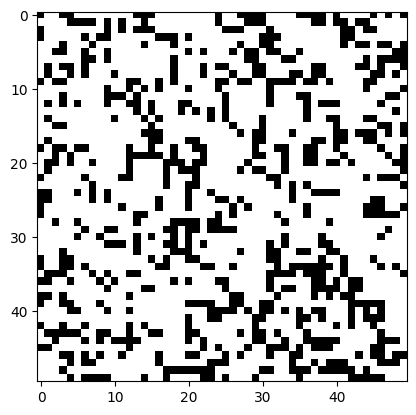

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def initialize_grid(size):
    """Initialize a grid with random live and dead cells."""
    return np.random.choice([0, 1], size=size, p=[0.7, 0.3])

def update_grid(grid):
    """Update the grid according to the rules of the Game of Life."""
    new_grid = grid.copy()
    # Get the number of live neighbors for each cell
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            # Calculate the sum of live neighbors
            total = (
                grid[i, (j-1)%grid.shape[1]] + grid[i, (j+1)%grid.shape[1]] +  # Left and Right
                grid[(i-1)%grid.shape[0], j] + grid[(i+1)%grid.shape[0], j] +  # Up and Down
                grid[(i-1)%grid.shape[0], (j-1)%grid.shape[1]] + grid[(i-1)%grid.shape[0], (j+1)%grid.shape[1]] +  # Top-Left and Top-Right
                grid[(i+1)%grid.shape[0], (j-1)%grid.shape[1]] + grid[(i+1)%grid.shape[0], (j+1)%grid.shape[1]]  # Bottom-Left and Bottom-Right
            )
            # Apply the rules of the Game of Life
            if grid[i, j] == 1:  # Cell is currently alive
                if total < 2 or total > 3:
                    new_grid[i, j] = 0  # Dies
            else:  # Cell is currently dead
                if total == 3:
                    new_grid[i, j] = 1  # Becomes alive
    return new_grid

def run_simulation(size, generations):
    """Run the Game of Life simulation."""
    grid = initialize_grid(size)
    fig, ax = plt.subplots()
    img = ax.imshow(grid, interpolation='nearest', cmap='binary')

    def update(frame):
        nonlocal grid
        grid = update_grid(grid)
        img.set_array(grid)
        return [img]

    ani = animation.FuncAnimation(fig, update, frames=generations, interval=200, blit=True)
    plt.show()

# Example usage
run_simulation(size=(50, 50), generations=100)


#### 89. How to get the n largest values of an array (★★★)

In [33]:
import numpy as np

# Create a sample array
array = np.array([10, 20, 5, 3, 25, 15, 30, 50, 40, 45])

# Specify how many largest values you want
n = 3

# Get the n largest values
n_largest = np.sort(array)[-n:]

print("The largest values are:", n_largest)


The largest values are: [40 45 50]


#### 90. Given an arbitrary number of vectors, build the cartesian product (every combinations of every item) (★★★)

In [34]:
import itertools
import numpy as np

# Define your arbitrary number of vectors
vectors = [
    np.array([1, 2]),
    np.array(['a', 'b']),
    np.array([True, False])
]

# Compute the Cartesian product
cartesian_product = list(itertools.product(*vectors))

# Display the result
for combination in cartesian_product:
    print(combination)


(1, 'a', True)
(1, 'a', False)
(1, 'b', True)
(1, 'b', False)
(2, 'a', True)
(2, 'a', False)
(2, 'b', True)
(2, 'b', False)


#### 91. How to create a record array from a regular array? (★★★)

In [37]:
import numpy as np

# Create a regular 2D array
data = np.array([
    [1, 2.5, 'Alice'],
    [2, 3.5, 'Bob'],
    [3, 4.5, 'Charlie']
])

# Define the names and types for the fields
names = ('id', 'score', 'name')
formats = ('i4', 'f4', 'U10')  # i4: int32, f4: float32, U10: Unicode string of length 10

record_array = np.core.records.fromarrays(data.T, names=names, formats=formats)

# Display the record array
print(record_array)

# Accessing elements by field names
print("First record:", record_array[0])
print("Names:", record_array['name'])



TypeError: Tuple must have size 2, but has size 3

#### 92. Consider a large vector Z, compute Z to the power of 3 using 3 different methods (★★★)

In [38]:
import numpy as np

# Create a large vector Z
Z = np.random.rand(1000000)  # Example: a vector with 1 million elements

# Method 1: Using the exponentiation operator
Z_power1 = Z ** 3

# Method 2: Using np.power function
Z_power2 = np.power(Z, 3)

# Method 3: Using np.multiply with broadcasting
Z_power3 = np.multiply(Z, np.multiply(Z, Z))  # Z * (Z * Z)

# Print the results (you can print only the first few elements for brevity)
print("Method 1 result (first 5 elements):", Z_power1[:5])
print("Method 2 result (first 5 elements):", Z_power2[:5])
print("Method 3 result (first 5 elements):", Z_power3[:5])


Method 1 result (first 5 elements): [0.51788778 0.42771268 0.36396068 0.00221782 0.83605037]
Method 2 result (first 5 elements): [0.51788778 0.42771268 0.36396068 0.00221782 0.83605037]
Method 3 result (first 5 elements): [0.51788778 0.42771268 0.36396068 0.00221782 0.83605037]


#### 93. Consider two arrays A and B of shape (8,3) and (2,2). How to find rows of A that contain elements of each row of B regardless of the order of the elements in B? (★★★)

In [39]:
import numpy as np

# Define arrays A and B
A = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [1, 5, 3],
    [2, 4, 6],
    [1, 2, 4],
    [8, 3, 7],
    [2, 3, 1]
])

B = np.array([
    [1, 2],
    [3, 4]
])

# Function to find rows in A that contain elements of each row in B
def find_rows_containing_elements(A, B):
    matching_rows = []

    # Check each row in B
    for row_b in B:
        # Create a mask for rows in A that contain all elements of row_b
        mask = np.all(np.isin(row_b, A), axis=1)
        matching_rows.append(A[mask])

    return matching_rows

# Find matching rows
result = find_rows_containing_elements(A, B)

# Print the results
for i, rows in enumerate(result):
    print(f"Rows of A that contain elements of row {i} of B: {rows}")


AxisError: axis 1 is out of bounds for array of dimension 1

#### 94. Considering a 10x3 matrix, extract rows with unequal values (e.g. [2,2,3]) (★★★)

In [40]:
import numpy as np

# Create a sample 10x3 matrix
matrix = np.array([
    [1, 2, 3],
    [2, 2, 3],
    [4, 5, 6],
    [7, 7, 7],
    [8, 8, 9],
    [10, 10, 10],
    [11, 12, 11],
    [13, 14, 15],
    [16, 16, 16],
    [17, 18, 19]
])

# Function to extract rows with unequal values
def extract_unequal_rows(mat):
    # Use np.unique to find unique values in each row and check if their count is more than 1
    unequal_rows_mask = np.array([len(np.unique(row)) > 1 for row in mat])
    return mat[unequal_rows_mask]

# Extract rows with unequal values
result = extract_unequal_rows(matrix)

# Print the result
print("Rows with unequal values:")
print(result)


Rows with unequal values:
[[ 1  2  3]
 [ 2  2  3]
 [ 4  5  6]
 [ 8  8  9]
 [11 12 11]
 [13 14 15]
 [17 18 19]]


#### 95. Convert a vector of ints into a matrix binary representation (★★★)

In [41]:
import numpy as np

# Create a vector of integers
vector = np.array([3, 5, 7, 10, 12])

# Function to convert vector to matrix binary representation
def vector_to_binary_matrix(vec):
    # Determine the number of bits needed for the largest integer
    max_value = np.max(vec)
    num_bits = max_value.bit_length()  # Get the number of bits required to represent max_value

    # Create a binary matrix
    binary_matrix = np.array([[int(bit) for bit in format(num, '0' + str(num_bits) + 'b')] for num in vec])

    return binary_matrix

# Convert the vector to a binary matrix
binary_representation = vector_to_binary_matrix(vector)

# Print the result
print("Binary representation of the vector:")
print(binary_representation)


AttributeError: 'numpy.int64' object has no attribute 'bit_length'

#### 96. Given a two dimensional array, how to extract unique rows? (★★★)

In [42]:
import numpy as np

# Create a sample 2D array with some duplicate rows
array_2d = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [1, 2, 3],
    [7, 8, 9],
    [4, 5, 6],
    [10, 11, 12]
])

# Extract unique rows
unique_rows = np.unique(array_2d, axis=0)

# Print the result
print("Unique rows in the array:")
print(unique_rows)


Unique rows in the array:
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


#### 97. Considering 2 vectors A & B, write the einsum equivalent of inner, outer, sum, and mul function (★★★)

In [43]:
import numpy as np

# Define two vectors
A = np.array([1, 2, 3])
B = np.array([4, 5, 6])


#### 98. Considering a path described by two vectors (X,Y), how to sample it using equidistant samples (★★★)?

In [44]:
import numpy as np
from scipy.interpolate import interp1d

# Define your vectors
X = np.array([0, 1, 2, 3, 4])
Y = np.array([0, 1, 0, 1, 0])

# Step 1: Calculate the cumulative distance along the path
dx = np.diff(X)
dy = np.diff(Y)
distances = np.sqrt(dx**2 + dy**2)  # Calculate the Euclidean distances between consecutive points
cumulative_distance = np.concatenate(([0], np.cumsum(distances)))  # Cumulative distance

# Step 2: Define the number of equidistant samples
num_samples = 10  # Change this to desired number of samples
equidistant_distances = np.linspace(0, cumulative_distance[-1], num_samples)  # Equidistant distances

# Step 3: Interpolate X and Y coordinates
interp_x = interp1d(cumulative_distance, X, kind='linear')
interp_y = interp1d(cumulative_distance, Y, kind='linear')

# Sample the path at equidistant distances
sampled_x = interp_x(equidistant_distances)
sampled_y = interp_y(equidistant_distances)

# Print the results
print("Sampled X coordinates:", sampled_x)
print("Sampled Y coordinates:", sampled_y)


Sampled X coordinates: [0.         0.44444444 0.88888889 1.33333333 1.77777778 2.22222222
 2.66666667 3.11111111 3.55555556 4.        ]
Sampled Y coordinates: [0.         0.44444444 0.88888889 0.66666667 0.22222222 0.22222222
 0.66666667 0.88888889 0.44444444 0.        ]


#### 99. Given an integer n and a 2D array X, select from X the rows which can be interpreted as draws from a multinomial distribution with n degrees, i.e., the rows which only contain integers and which sum to n. (★★★)

In [45]:
import numpy as np

def select_multinomial_rows(X, n):
    # Convert X to a NumPy array if it isn't already
    X = np.array(X)

    # Condition 1: Check if all elements are non-negative integers
    non_negative_integers = np.all((X >= 0) & (X == np.floor(X)), axis=1)

    # Condition 2: Check if the sum of each row equals n
    sum_equals_n = np.sum(X, axis=1) == n

    # Combine both conditions
    valid_rows = non_negative_integers & sum_equals_n

    # Select rows that satisfy both conditions
    selected_rows = X[valid_rows]

    return selected_rows

# Example usage
n = 5
X = np.array([[1, 2, 2], [0, 5, 0], [3, 2, 1], [2, 2, 1], [3, 1, 1], [6, 0, 0]])
selected_rows = select_multinomial_rows(X, n)
print("Selected Rows:")
print(selected_rows)


Selected Rows:
[[1 2 2]
 [0 5 0]
 [2 2 1]
 [3 1 1]]


#### 100. Compute bootstrapped 95% confidence intervals for the mean of a 1D array X (i.e., resample the elements of an array with replacement N times, compute the mean of each sample, and then compute percentiles over the means). (★★★)

In [46]:
import numpy as np

def bootstrap_confidence_interval(X, N=1000, alpha=0.05):
    # Convert X to a NumPy array if it isn't already
    X = np.array(X)

    # Number of data points
    n = len(X)

    # Generate bootstrap samples and compute their means
    bootstrap_means = np.empty(N)
    for i in range(N):
        # Resample X with replacement
        sample = np.random.choice(X, size=n, replace=True)
        # Compute the mean of the sample
        bootstrap_means[i] = np.mean(sample)

    # Compute the percentiles for the confidence intervals
    lower_percentile = np.percentile(bootstrap_means, 100 * (alpha / 2))
    upper_percentile = np.percentile(bootstrap_means, 100 * (1 - alpha / 2))

    return lower_percentile, upper_percentile

# Example usage
X = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
lower_ci, upper_ci = bootstrap_confidence_interval(X)

print(f"Bootstrapped 95% Confidence Interval for the Mean: ({lower_ci}, {upper_ci})")


Bootstrapped 95% Confidence Interval for the Mean: (3.8, 7.102499999999997)
